# 결정 트리

## 로지스틱 회귀로 와인 분류하기

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

와인 데이터를 먼저 불러오자. 앞에서 열 3개는 각각 알코올 도수,당도,PH 값을 나타낸다. 네번째 열은 타깃값으로 0이면 레드와인 1이면 화이트 와인이다. 

In [8]:
wine = pd.read_csv('https://raw.githubusercontent.com/rickiepark/hg-mldl/master/wine.csv')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


레드 와인과 화이트 와인을 구분하는 이진 분류 문제이고, 화이트 와인이 양성 클래스이다. 즉 전체 와인에서 화이트 와인을 골라내는 문제이다. 

In [9]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


출력 결과를 보면 총 6497개의 샘플이 있고 누락된 값은 없는 것 같다.

In [12]:
wine.isnull().sum()

alcohol    0
sugar      0
pH         0
class      0
dtype: int64

In [14]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [16]:
wine['class'].unique()

array([0., 1.])

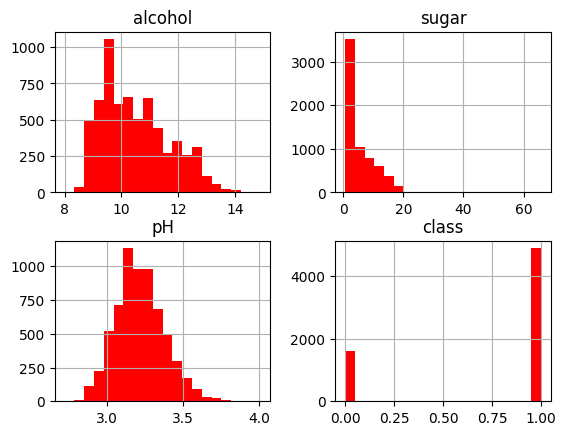

In [19]:
wine.hist(bins=20, color='red')
plt.show()

평균, 표준편차, 최소, 최대값과 중간값, 1사분위수, 3사분위수를 알려준다. 여기서 알 수 있는 것은 알코올 도수와 당도, PH 값의 스케일이 다르다는 것이다. 이전에 배웠던 사이킷런의 StandardScaler 클래스를 사용해 특성을 표준화하자. 


## 학습/검증 세트

데이터프레임을 넘파이 배열로 바꾸고 훈련 세트와 테스트 세트로 나누자.

In [20]:
data = wine.drop(['class'], axis=1).values
target = wine['class'].values

In [21]:
data.shape, target.shape

((6497, 3), (6497,))

train_test_split() 함수는 설정값을 지정하지 않으면 25%를 테스트 세트로 지정한다. 샘플개수가 충분히 많으므로 20% 정도만 테스트 세트로 나누었다. 코드의 test_size=0.2가 이런 의미이다.

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.2, random_state=50)

In [25]:
print(X_train.shape, X_test.shape)

(5197, 3) (1300, 3)


알코올 도수와 당도, PH 값의 스케일이 다른 범위 값을 StandardScaler 클래스를 사용해 특성을 표준화하자. 

In [26]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

In [28]:
ss.fit(X_train)

StandardScaler()

In [31]:
X_train_scaled = ss.transform(X_train)

In [32]:
X_test_scaled = ss.transform(X_test)

In [34]:
type(X_train_scaled)

numpy.ndarray

In [35]:
X_train_scaled.min(), X_train_scaled.max()

(-3.1001913471615157, 12.606190751704741)

In [36]:
X_test_scaled.min(), X_test_scaled.max()

(-2.788730274131511, 5.462398293870139)

In [37]:
X_train_scaled[:3]

array([[ 1.10159051,  1.78606065, -0.48391833],
       [ 0.34441745, -0.84586288,  0.69963374],
       [-0.83340731,  1.18030048,  1.26026368]])

In [38]:
X_train[:3]

array([[11.8 , 14.  ,  3.14],
       [10.9 ,  1.4 ,  3.33],
       [ 9.5 , 11.1 ,  3.42]])

이제 표준점수로 변환된 train_scaled와 test_scaled를 사용해 로지스틱 회귀 모델을 훈련하자.



In [40]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()

In [41]:
lr_clf.fit(X_train_scaled, Y_train)

/Users/ihanjo/Library/Python/3.13/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/ihanjo/Library/Python/3.13/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/ihanjo/Library/Python/3.13/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept


LogisticRegression()

In [42]:
print("Train score :",lr_clf.score(X_train_scaled, Y_train))
print("Test score :",lr_clf.score(X_test_scaled, Y_test))

Train score : 0.7796805849528574
Test score : 0.7853846153846153


/Users/ihanjo/Library/Python/3.13/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/ihanjo/Library/Python/3.13/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/ihanjo/Library/Python/3.13/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/ihanjo/Library/Python/3.13/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/ihanjo/Library/Python/3.13/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/ihanjo/Library/Python/3.13/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


점수가 높지 않다. ***훈련 세트와 테스트 세트의 점수가 모두 낮아서 모델이 과소적합*** 이라 볼 수 있다.이 문제를 해결하기 위해 규제 매개 변수 C의 값을 바꾸던지 solver 매개변수에서 다른 알고리즘을 선택할 수도 있다. 또한 다항 특성을 만들어 추가할 수도 있다.

### 설명하기 쉬운 모델과 어려운 모델

로지스틱 회귀가 학습한 계수와 절편을 출력해 보자.

In [44]:
lr_clf.coef_

array([[ 0.52119637,  1.6623573 , -0.69600674]])

In [45]:
lr_clf.intercept_

array([1.76817573])

사실 이 모델이 왜 저런 계수 값을 학습했는지 정확히 이해하기 어렵다. 

아마도 알코올 도수와 당도가 높을수록 화이트 와인일 가능성이 높고, PH가 높을수록 레드 와인일 가능성이 높은 것 같다. 하지만 정확히 이 숫자가 어떤 의미인지 설명하긴 어렵다. 더군다나 다항 특성을 추가한다면 설명하기가 더 어려울 것이다. 대부분 러닝머신 모델은 이렇게 학습의 결과를 설명하기 어렵다. 쉬운 방법으로 설명할 수 있는 모델을 알아보자.

## 결정 트리

결정 트리 모델이 이유를 설명하기가 쉽다. 결정 트리 모델은 스무고개와 같다. 데이터를 잘 나눌 수 있는 질문을 찾는다면 계속 질문을 추가해서 분류 정확도를 높일 수 있다. 사이킷런의 DecisionTreeClassifier 클래스를 사용해 결정 트리 모델을 훈련해 보자. fit() 메서드를 호출해서 모델을 훈련한 다음 score() 메서드로 정확도를 평가해 보자.

In [46]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()

In [48]:
dt_clf.fit(X_train_scaled, Y_train)

DecisionTreeClassifier()

In [49]:
print("Train score :",dt_clf.score(X_train_scaled, Y_train))
print("Test score :",dt_clf.score(X_test_scaled, Y_test))

Train score : 0.9974985568597268
Test score : 0.8669230769230769


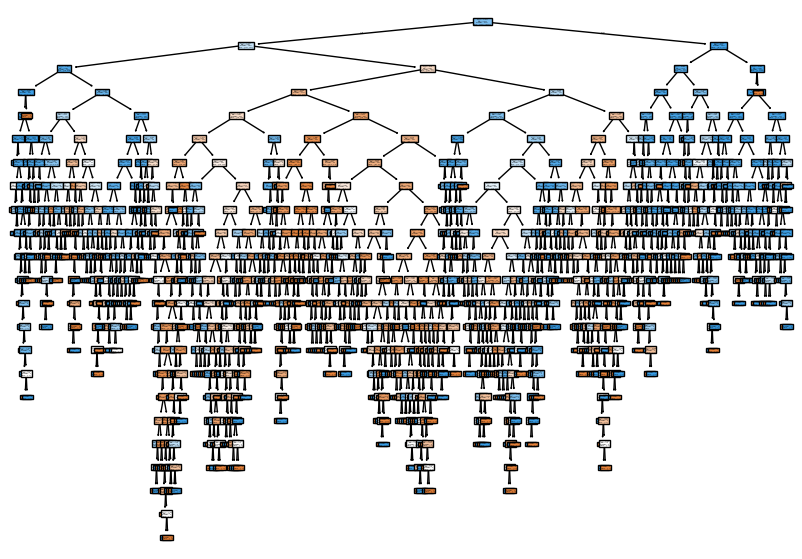

In [50]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt_clf, filled=True)

plt.show()

너무 복잡하니 plot_tree() 함수에서 트리의 깊이를 제한해서 출력해 보자. 

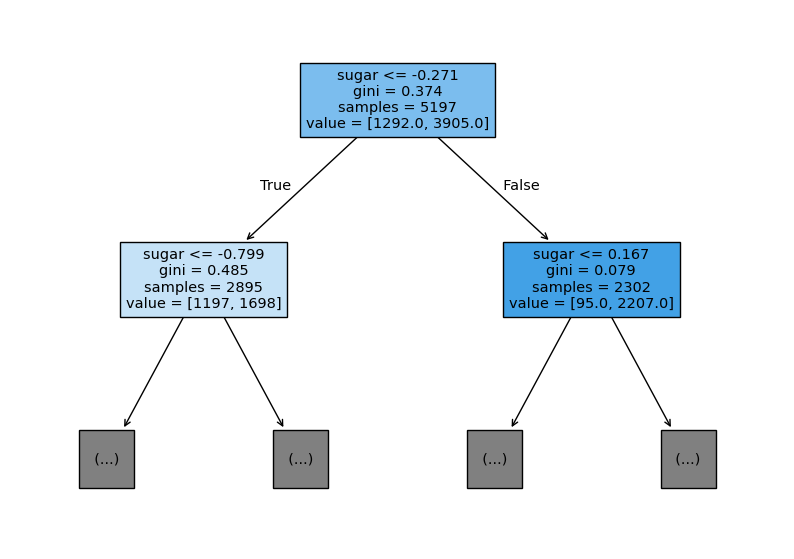

In [52]:
plt.figure(figsize=(10,7))

plot_tree(dt_clf, filled=True, max_depth=1, feature_names=['alcohol', 'sugar', 'pH'])

plt.show()


이번엔 노드 상자 안에 있는 gini에 대해 알아보자.

### - 불순도

gini는 지니 불순도(gini impurity)를 의미한다. DecisionTreeClassifier 클래스의 criterion 매개변수의 기본값이 gini이다. creterion 매개변수의 용도는 노드에서 데이터를 분할할 기준을 정하는 것이다. 앞의 루트 노드에서 -0.239를 기준으로 왼쪽과 오른쪽 노드로 나누었다. 나눈 방법은 바로 criterion 매개변수에 지정한 지니 불순도를 사용한 것이다. 지니 불순도는 클래스의 비율을 제곱해서 더한 다음 1에서 빼면된다.

지니 불순도 = 1 - (음성 클래스 비율의 제곱 + 양성 클래스 비율의 제곱)


### - 엔트로피

엔트로피(Entropy)는 불순도(Impurity)를 수치적으로 나타낸 척도입니다. 엔트로피가 높다는 것은 불순도가 높다는 뜻이고, 엔트로피가 낮다는 것은 불순도가 낮다는 뜻입니다. 엔트로피가 1이면 불순도가 최대입니다

불순도/엔트로피 참고: https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-4-%EA%B2%B0%EC%A0%95-%ED%8A%B8%EB%A6%ACDecision-Tree

## - 가지치기

예를 들어 열매를 잘 맺기 위해 과수원에서 가지치기를 하는 것처럼 결정 트리도 가지치기를 해야 한다. 그렇지 않으면 무작정 끝까지 자라나는 트리가 만들어진다. 훈련 세트에는 아주 잘 맞겠지만 테스트 세트에서 점수는 그에 못 미칠 것이다. 이것을 일반화가 잘 되지 않았다고 한다.

이제 가지치기를 해보자. 결정 트리에서 가지치기를 하는 가장 간단한 방법은 자라날 수 있는 트리의 최대 깊이를 지정하는 것이다. DecisionTreeClassifier 클래스의 max_depth 매개변수를 3으로 지정하여 모델을 만들어 보자.

In [70]:
dt_clf2 = DecisionTreeClassifier(max_depth=3, random_state=50)
dt_clf2.fit(X_train_scaled, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=50)

In [71]:
print("Train score :",dt_clf2.score(X_train_scaled, Y_train))
print("Test score :",dt_clf2.score(X_test_scaled, Y_test))

Train score : 0.8454877814123533
Test score : 0.8515384615384616


훈련 세트의 성능은 낮아졌지만 테스트 세트의 성능은 거의 그대로이다. plot_tree() 함수로 그려보자.

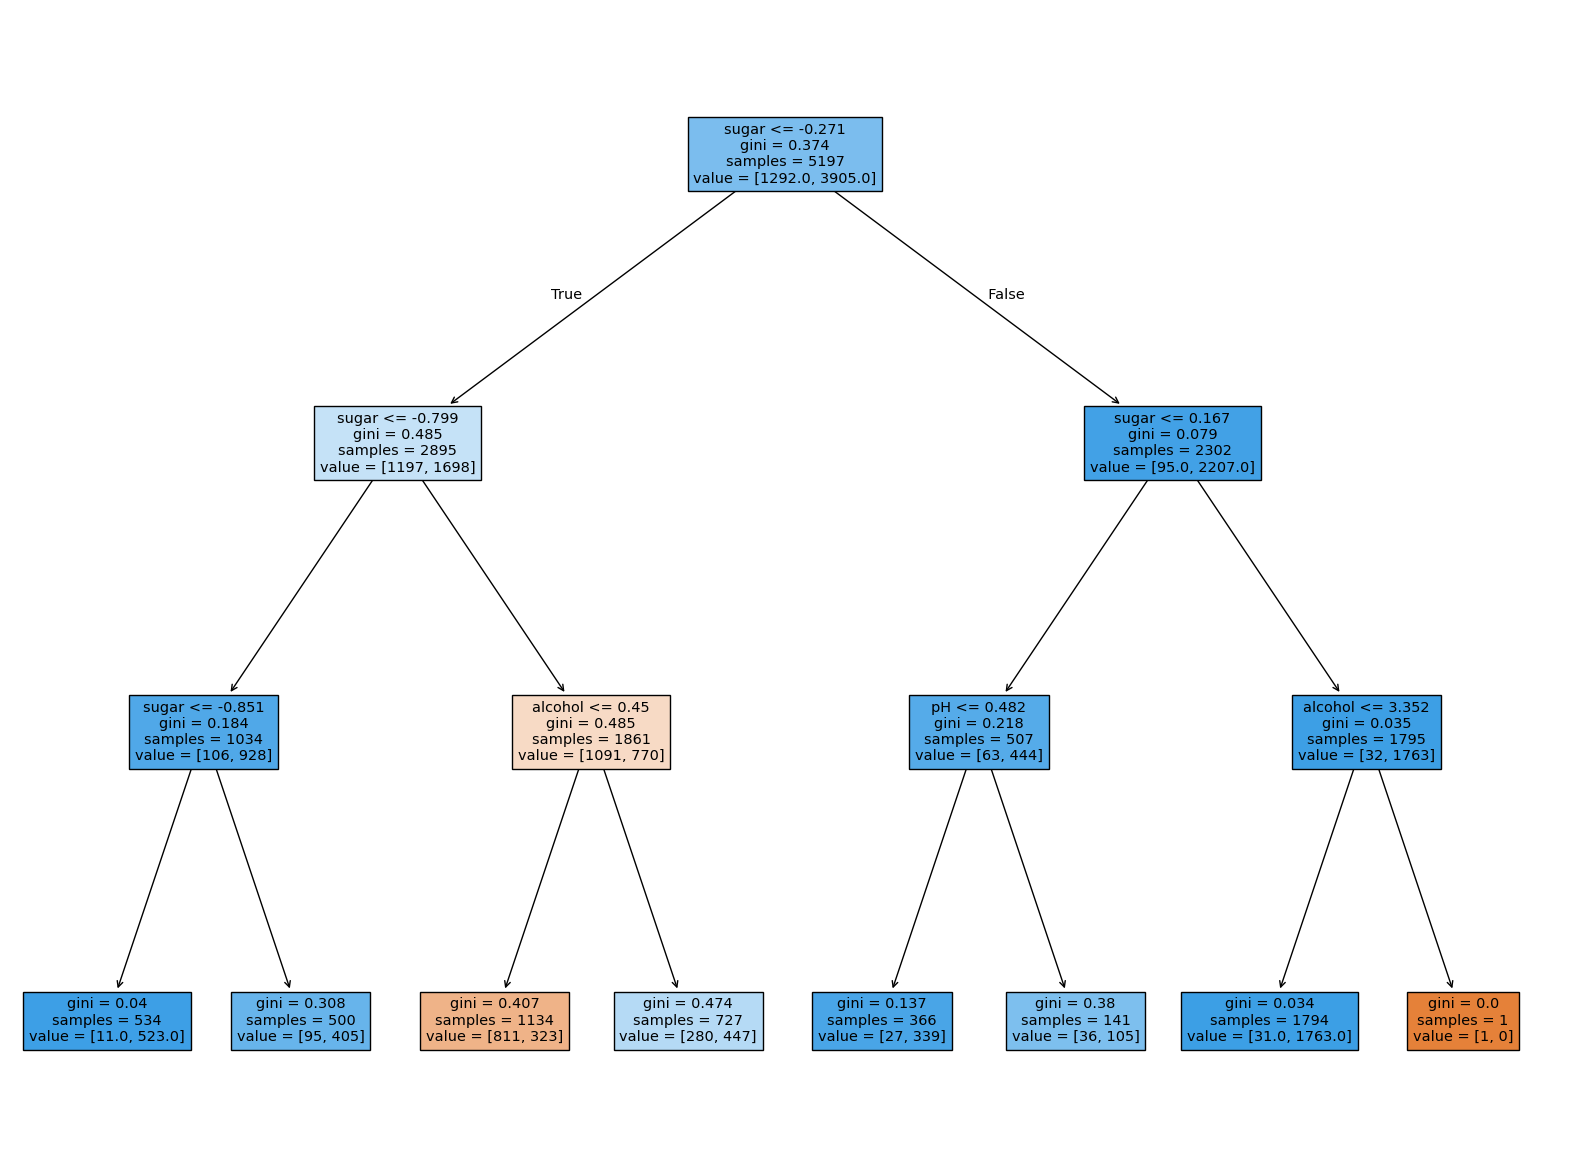

In [72]:
plt.figure(figsize=(20,15))

plot_tree(dt_clf2, filled=True, feature_names=['alcohol', 'sugar', 'pH'])

plt.show()

## - 전처리 필요 없는 결정트리

앞서 불순도를 기준으로 샘플을 나눈다고 했다. 불순도는 클래스별 비율을 가지고 계산하였다. 샘플을 어떤 클래스 비율로 나누는지 계산할 때 특성값의 스케일이 계산에 영향을 미칠까? 아니다. 특성값의 스케일은 결정 트리 알고리즘에 아무런 영향을 미치지 않는다. 따라서 표준화 전처리를 할 필요가 없다. 이것이 결정 트리 알고리즘의 또 다른 장점 중 하나이다.

그럼 앞서 전처리하기 전의 훈련 세트와 테스트 세트로 결정 트리모델을 다시 훈련해 보자.

In [77]:
dt_clf3 = DecisionTreeClassifier(random_state=50)
dt_clf3.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=50)

In [78]:
print("Train score :",dt_clf3.score(X_train, Y_train))
print("Test score :",dt_clf3.score(X_test, Y_test))

Train score : 0.9974985568597268
Test score : 0.8630769230769231


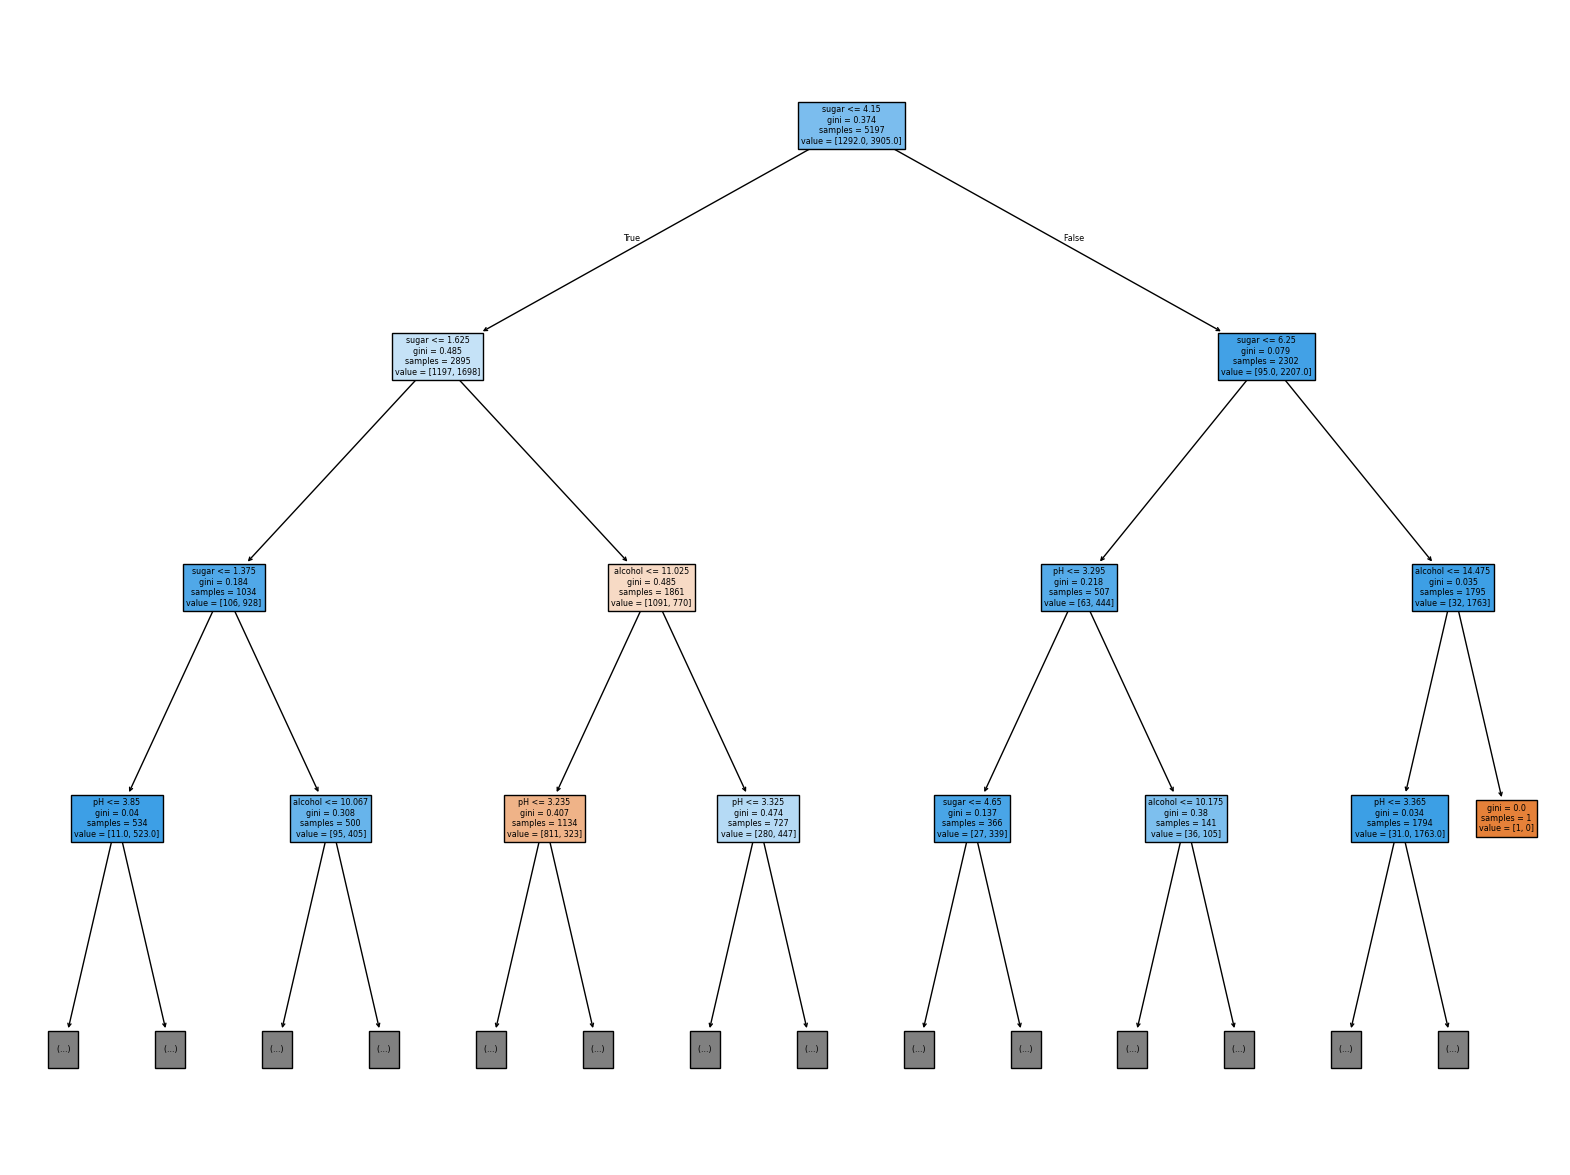

In [81]:
plt.figure(figsize=(20,15))

plot_tree(dt_clf3, max_depth=3, filled=True, feature_names=['alcohol', 'sugar', 'pH'])

plt.show()

결과를 보면 같은 트리지만, 특성값을 표준점수로 바꾸지 않은 터라 이해하기가 훨씬 쉽다. 당도가 1.625보다 크고 4.325보다 작은 와인중 알코올 도수가 11.025와 같거나 작은 것이 레드 와인이다. 그 이외에는 모두 화이트 와인으로 예측했다.


#### 특성 중요도

마지막으로 결정 트리는 어떤 특성이 가장 유용한지 나타내는 특성 중요도를 계산해 준다. 이 트리의 루트 노드와 깊이 1에서 sugar를 사용했기 때문에 아마도 sugar가 가장 유용한 특성중 하나일 것 같다. 특성 중요도는 결정 트리 모델의 featureimportances 속성에 저장되어 있다. 이 값을 출력해 보자.

In [82]:
# ['alcohol', 'sugar', 'pH']

dt_clf3.feature_importances_

array([0.24490859, 0.50203922, 0.2530522 ])

역시 두 번째 특성인 sugar가 0.87 정도로 특성 중요도가 가장 높다. 특성 중요도는 각 노드의 정보 이득과 전체 샘플에 대한 비율을 곱한 후 특성별로 더하여 계산한다. 특성 중요도를 활용하면 결정 트리 모델을 특성 선택에 활용할 수 있다. 이것이 결정 트리 알고리즘의 또 다른 장점중 하나이다.

hyper_parameter

```
def __init__(self,
             *,
             criterion: Any = "gini",
             splitter: Any = "best",
             max_depth: Any = None,
             min_samples_split: Any = 2,
             min_samples_leaf: Any = 1,
             min_weight_fraction_leaf: Any = 0.0,
             max_features: Any = None,
             random_state: Any = None,
             max_leaf_nodes: Any = None,
             min_impurity_decrease: Any = 0.0,
             class_weight: Any = None,
             ccp_alpha: Any = 0.0,
             monotonic_cst: Any = None) -> None
```

파라미터: criterion
- 설명: 분할의 기준(불순도 측정 방법). “gini”(지니 불순도) 또는 “entropy”(엔트로피) 선택. 트리를 분할할 때 데이터의 순수도를 계산하는 방법.

파라미터: splitter
- 설명: 분할할 노드 선정 방법. “best”(가장 좋은 분할) 또는 “random”(무작위 분할).

파라미터: max_depth
- 설명: 트리의 최대 깊이(레벨 수) 제한. None이면 제한 없음. 값이 작을수록 트리 복잡성이 줄어듦(과적합 방지).

파라미터: min_samples_split
- 설명: 노드가 분할되기 위한 최소 샘플 수. 값이 높을수록 트리가 덜 복잡해짐.

파라미터: min_samples_leaf
- 설명: 리프(끝) 노드가 가져야 하는 최소 샘플 수. 과적합 방지에 사용됨.

파라미터: min_weight_fraction_leaf
- 설명: 리프 노드가 가져야 하는 최소 샘플 가중치 비율. 편중된 데이터를 다룰 때 유용.

파라미터: max_features
- 설명: 분할에 사용할 최대 피처 수. None이면 모든 피처 사용.

파라미터: random_state
- 설명: 난수 시드 설정. 실험의 결과를 재현할 때 사용.

파라미터: max_leaf_nodes
- 설명: 최대 리프 노드 수. 이 값보다 많은 리프 노드는 생성되지 않음.

파라미터: min_impurity_decrease
- 설명: 분할이 일어나기 위한 최소 불순도 감소량. 이 값 이상으로 불순도가 감소할 때만 분할함.

파라미터: class_weight
- 설명: 클래스별 가중치 조정. 불균형 데이터셋에서 소수 클래스를 보정할 때 사용.

파라미터: ccp_alpha
- 설명: 비용 복잡도 가지치기 알파 값. 값이 클수록 더 많은 가지치기가 이루어져 트리가 단순해짐.

파라미터: monotonic_cst
- 설명: 단조 제약 설정용. 예: 어떤 특성이 증가할수록 예측값이 늘거나 줄어야 함을 보장. 거의 사용되지 않음.

## 예)

불순물 기준을 변경해 보자

In [83]:
# min_impurity_decrease
# “불순도 감소량”이 이 값 이상이어야 실제로 분할을 진행하게 하는 중요한 하이퍼파라미터
dt_clf4 = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=50)
dt_clf4.fit(X_train, Y_train)

DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=50)

In [84]:
print("Train score :",dt_clf4.score(X_train, Y_train))
print("Test score :",dt_clf4.score(X_test, Y_test))

Train score : 0.8851260342505292
Test score : 0.8592307692307692


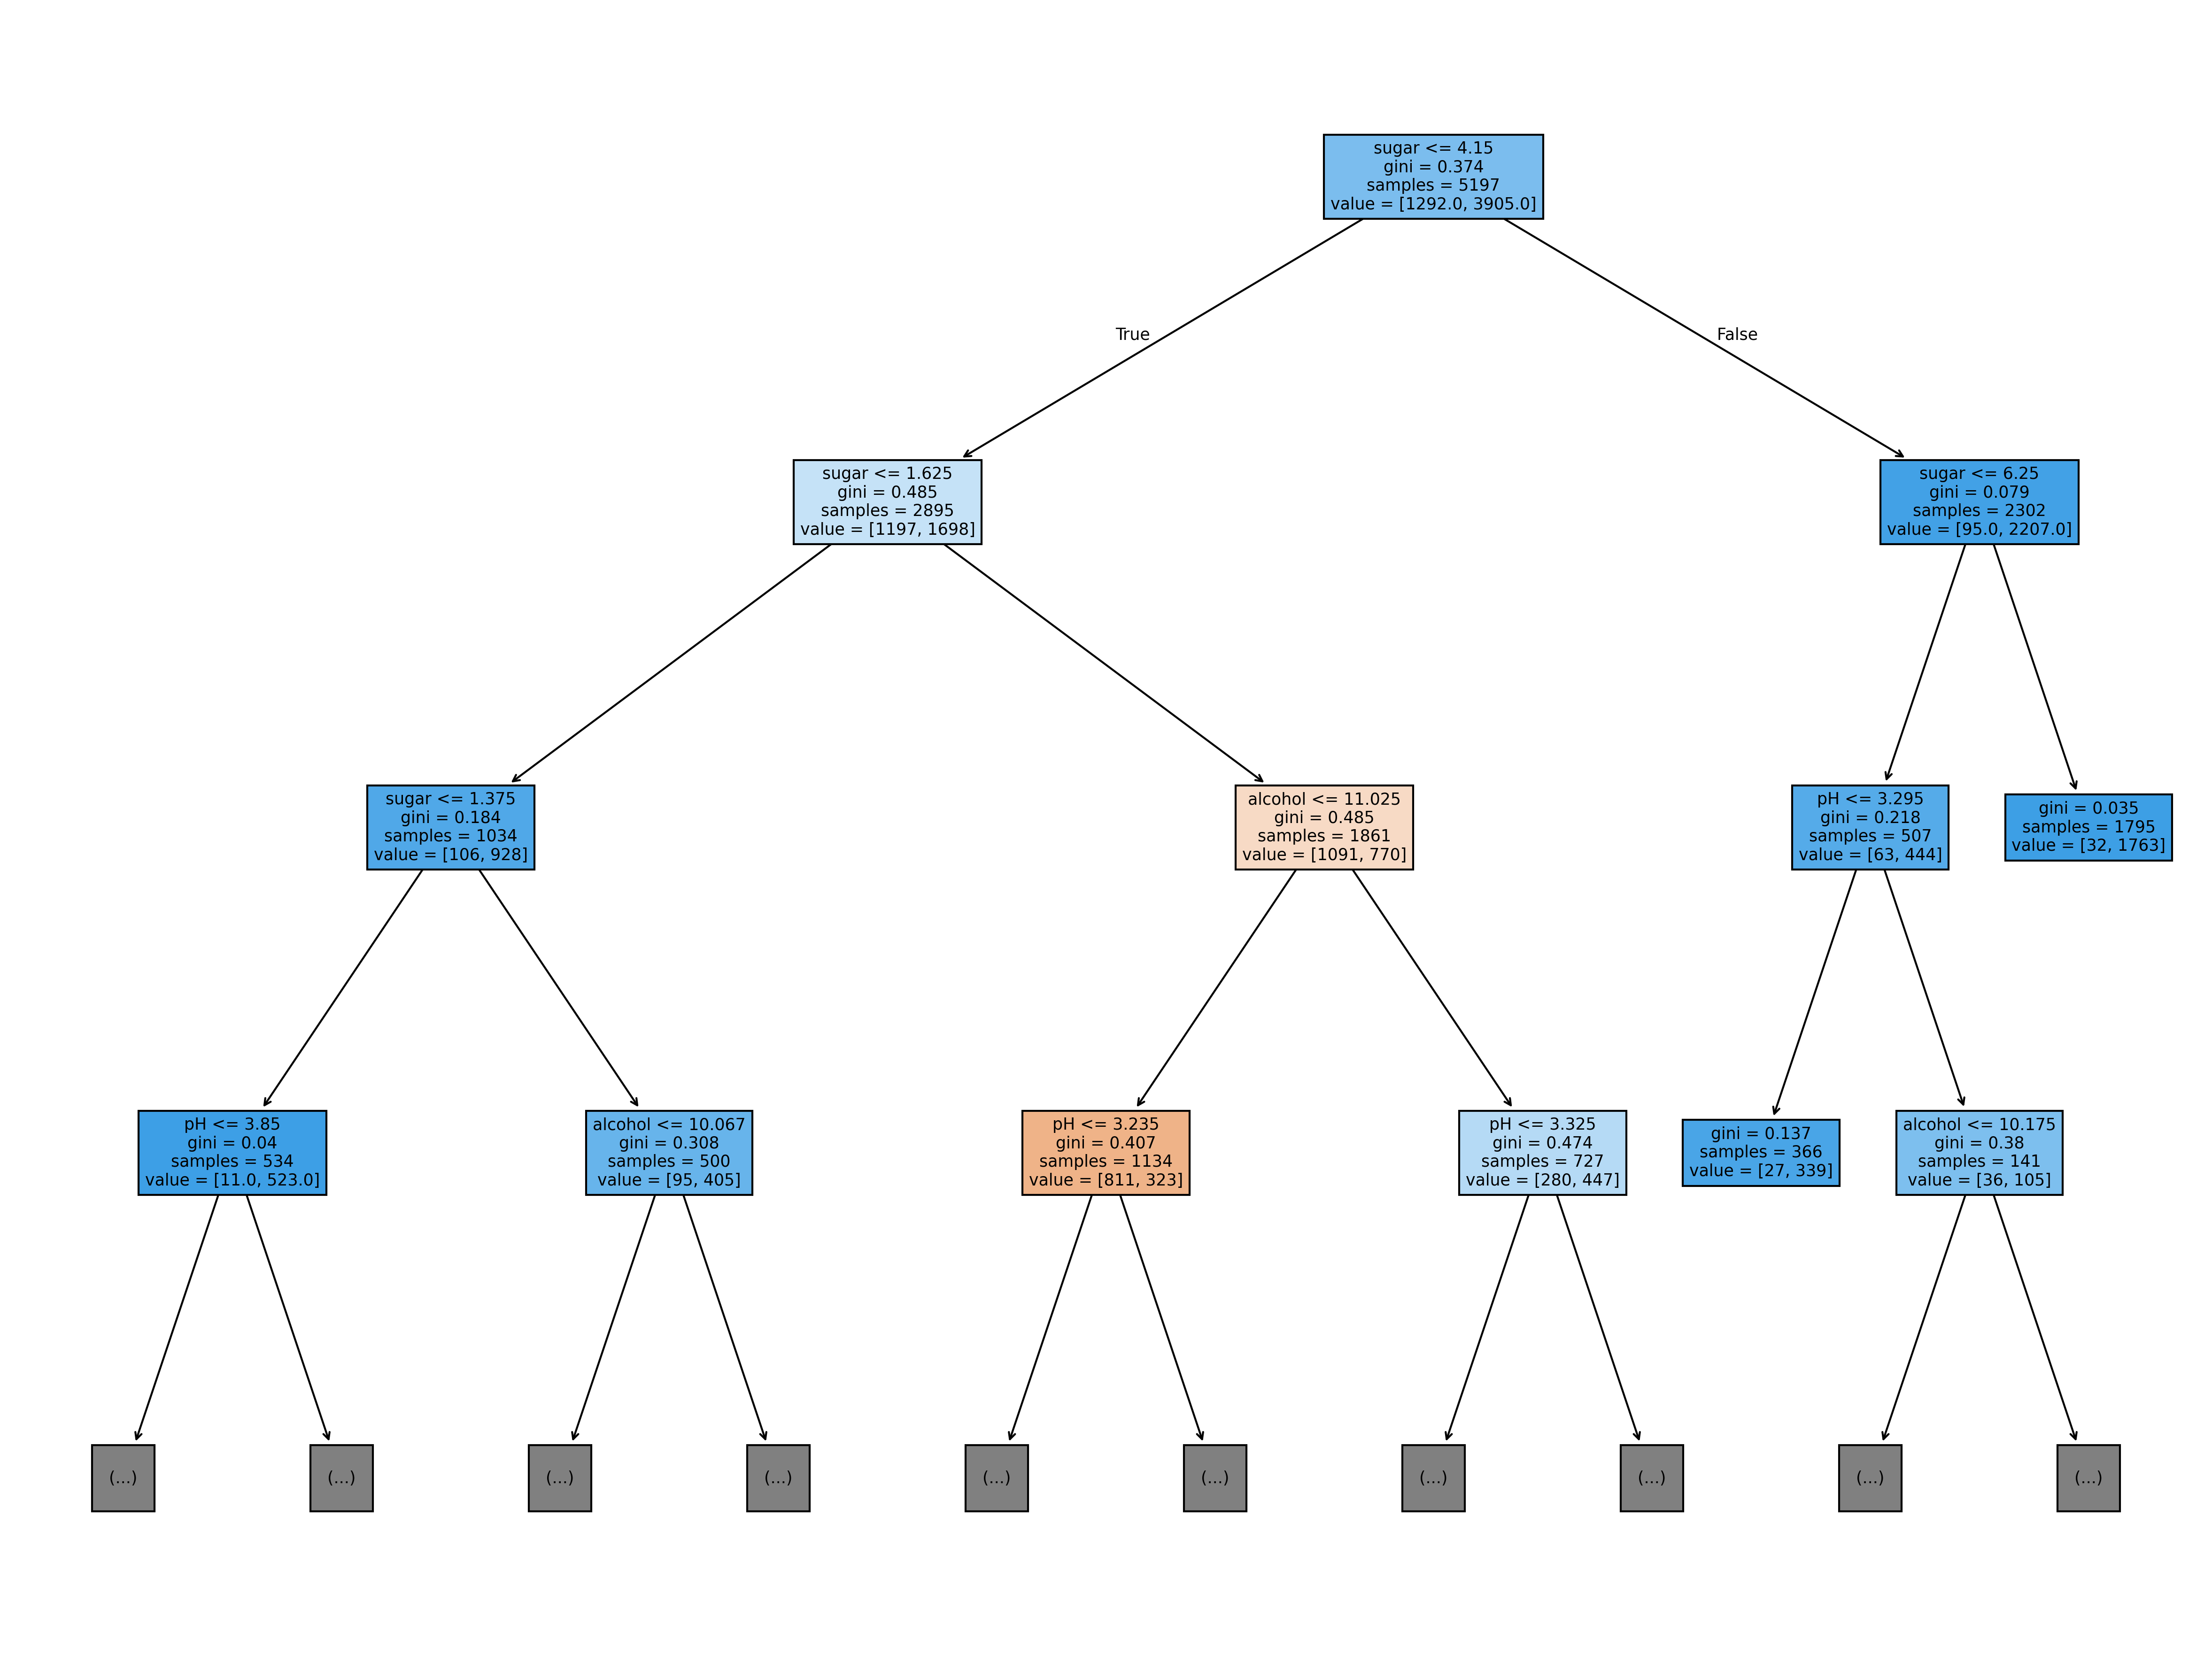

In [85]:
plt.figure(figsize=(20,15), dpi=300)

plot_tree(dt_clf4, max_depth=3, filled=True, feature_names=['alcohol', 'sugar', 'pH'])

plt.show()